#Configurações Iniciais


**Importando Bibliotecas**

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

**Lendo arquivos CSV**

In [180]:
base = pd.read_csv('heart-disease.csv')
base

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#Pré-Processamento de dados

**Valores Duplicados e Amostras inconsistentes**

In [181]:
Nome_das_Colunas = base.columns[:-1]

In [182]:
df_duplicates = base[base.duplicated(subset=None,keep=False)]
# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [183]:
def delDuplicatas( df_dataset ):
    '''
    Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    '''

    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

base = delDuplicatas( base )

In [184]:
# para detectar inconsistências, a rotina abaixo obtém as amostras onde os valores
# dos atributos continuam duplicados. Neste caso, os atributos serão iguais, mas as classes serão distintas
df_duplicates = base[base.duplicated(subset=Nome_das_Colunas,keep=False)]

# se tiver valores inconsistentes, imprime
if len(df_duplicates)>0:
    print('\nAmostras inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem mostras inconsistentes')

Não existem mostras inconsistentes


**Estatística dos Dados**

In [185]:
CompiladoBase= base.describe()
display(CompiladoBase)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


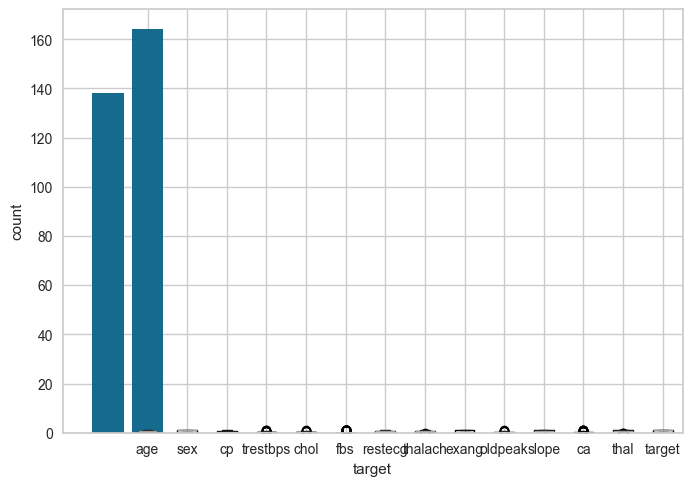

In [186]:
from sklearn.preprocessing import MinMaxScaler
def normaliza(df):
 # Inicializa o MinMaxScaler
 scaler = MinMaxScaler()

 colunas_para_normalizar = df.iloc[:, :-1]

 # Ajusta e transforma os dados com o MinMaxScaler
 df_normalizada = pd.DataFrame(scaler.fit_transform(colunas_para_normalizar), columns=colunas_para_normalizar.columns)

 # Adiciona a última coluna não normalizada ao DataFrame normalizado
 df_normalizada[df.columns[-1]] = df[df.columns[-1]]

 # Exibe o DataFrame normalizado com a última coluna inalterada

 return df_normalizada

# gera um bloxplot para cada atributo
normaliza(base).boxplot(figsize=(15,7))
plt.show()

**Removendo Outliers**

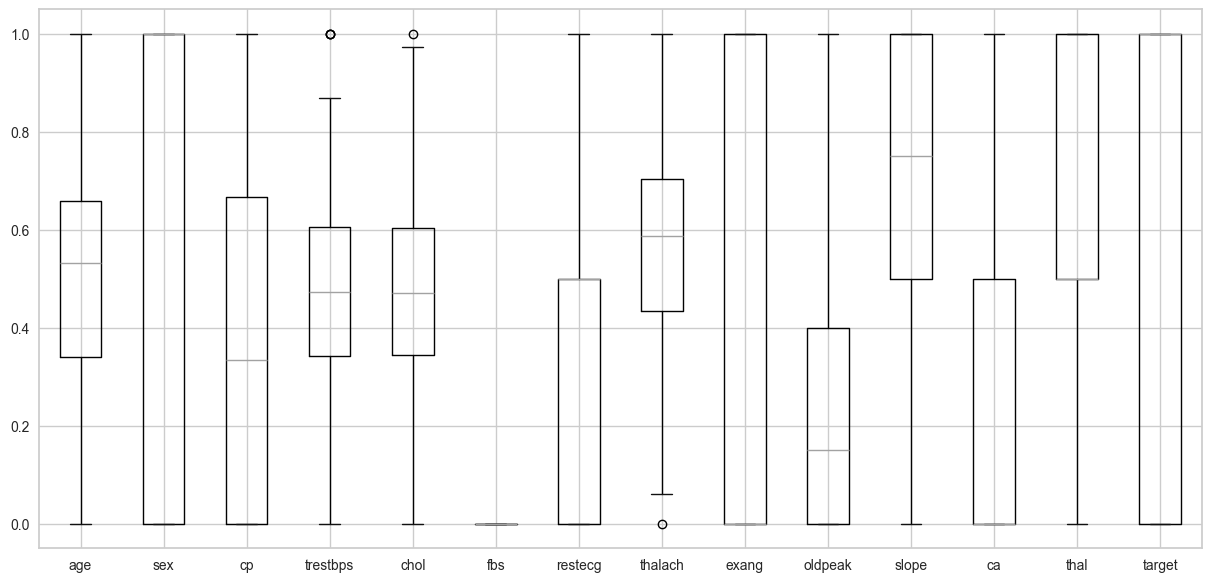

In [187]:
import math

#Calcula o Quartil Q
def quart(df,Q):
 n = len(df)
 LQ = (Q*(n + 1))/4
 if(math.ceil(LQ) != math.floor(LQ)):
  res = (df[math.ceil(LQ)] + df[math.floor(LQ)])/2
 else:
  res = df[math.ceil(LQ)]
 return res

#Calcula o IQR de uma coluna do Dataframe
def getIQR(df,col):
 sorted = np.sort(df[col].array)
 Q1 = quart(sorted,1)
 Q3 = quart(sorted,3)
 return Q3-Q1


# Definindo a função para remover outliers baseada no IQR
def remove_outliers(df):
    # Para cada coluna numérica
    outliers_removed = pd.DataFrame()

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calcula o IQR
        IQR = getIQR(base,col)
        # Definindo os limites inferior e superior
        lower_bound = quart(np.sort(base[col].array),1) - 1.5 * IQR
        upper_bound = quart(np.sort(base[col].array),3) + 1.5 * IQR

         # Identificando os outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        
        # Armazenando os outliers removidos
        outliers_removed = pd.concat([outliers_removed, outliers])
        # Filtra os dados para remover outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    display(outliers_removed);
    return df

# Remover outliers da base
base_cleaned = remove_outliers(base)

#utilizar base pós limpeza de outliers
#base = base_cleaned

# Exibir boxplot da base limpa
normaliza(base_cleaned).boxplot(figsize=(15, 7))
plt.show()

#Separar Amostras

**Quantidade de instâncias**

In [188]:
Classificação = base.columns[-1]
np.unique(base[Classificação], return_counts=True)

(array([0, 1]), array([138, 164]))

In [189]:
sns.countplot(x = base[Classificação]);

**Separando os atributos de entrada e de classe**

In [190]:
x_prev = base.iloc[:, :-1]
x_prev

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [191]:
y_classe = base.iloc[:,-1]
y_classe

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

**Separação de dados**

In [192]:
x_prev.shape

(302, 13)

In [193]:
y_classe.shape

(302,)

In [194]:
from sklearn.model_selection import train_test_split
#colocando random state em 0 para testes mais consistentes
x_treino, x_teste, y_treino, y_teste = train_test_split(x_prev, y_classe, test_size = 0.20, random_state = 0)

In [195]:
x_treino.shape

(241, 13)

In [196]:
x_teste.shape

(61, 13)

**Balancear dados?**

In [197]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

#Remova o comentário para UnderSampling

#balanceamento = TomekLinks(sampling_strategy='auto')

#Remova o comentário para OverSampling

#balanceamento = SMOTE(sampling_strategy='minority')

#Atenção!! Para utilizar qualquer etapa de balanceamento, a linha abaixo DEVE estar descomentada, caso não utilize, deixe comentada

#x_treino, y_treino = balanceamento.fit_resample(x_treino, y_treino)

#Área de Treino dos modelos

**NaiveBayes**

In [198]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)

In [199]:
confusion_matrix(y_teste, previsoes)

array([[24,  3],
       [ 3, 31]])

In [200]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



**Árvore de Decisão**

In [201]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {
    'criterion':  ['gini', 'entropy', 'log_loss'],
    'splitter': ['random'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

In [202]:
modelo.fit(x_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'splitter': 'random', 'max_features': None, 'max_depth': 4, 'criterion': 'log_loss'}
0.7925


In [203]:
modelo= DecisionTreeClassifier(**modelo.best_params_)
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, splitter='random')

In [204]:
previsoes = modelo.predict(x_teste)
accuracy_score(y_teste,previsoes)

0.7704918032786885

In [205]:
confusion_matrix(y_teste, previsoes)

array([[23,  4],
       [10, 24]])

In [206]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        27
           1       0.86      0.71      0.77        34

    accuracy                           0.77        61
   macro avg       0.78      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



**Random Forest**

In [207]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'criterion':  ['gini', 'entropy', 'log_loss'],
    'n_estimators': [80,90,95,100],
    'max_features': [None, 'sqrt', 1.5,2,3],
    'random_state' : [None, 21, 42],
}

modelo = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

In [208]:
modelo.fit(x_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'random_state': 21, 'n_estimators': 95, 'max_features': 3, 'criterion': 'gini'}
0.8383333333333333


c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

In [209]:
modelo= RandomForestClassifier(**modelo.best_params_)
modelo.fit(x_treino, y_treino)

RandomForestClassifier(max_features=3, n_estimators=95, random_state=21)

In [210]:
previsoes = modelo.predict(x_teste)
accuracy_score(y_teste,previsoes)

0.8688524590163934

In [211]:
confusion_matrix(y_teste, previsoes)

array([[24,  3],
       [ 5, 29]])

In [212]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

